In [1]:
import pandas as pd
import datetime

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
emer = pd.read_csv('EmergencyICD4.csv')
emer.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,EDREGTIME,EDOUTTIME,DIAGNOSIS,DIAG.ICD9_CODE,DIAG.SEQ_NUM
0,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,40301,1
1,109,173633,2141-12-08 01:40:00,2141-12-14 17:16:00,NaN,EMERGENCY,2141-12-07 21:10:00,2141-12-08 02:48:00,ABDOMINAL PAIN,40301,1
2,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,EMERGENCY,2194-06-13 15:19:00,2194-06-13 20:05:00,GASTROINTESTINAL BLEED,53100,1
3,113,109976,2140-12-12 22:46:00,2140-12-27 19:30:00,NaN,EMERGENCY,2140-12-12 19:29:00,2140-12-13 00:12:00,HYDROCEPHALUS,1915,1
4,115,114585,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,NaN,NaN,ADRENAL INSUFFICIENCY,1940,1


In [3]:
len(emer)

43370

In [4]:
emer['ADMITTIME'] = pd.to_datetime(emer['ADMITTIME'])
emer['DISCHTIME'] = pd.to_datetime(emer['DISCHTIME'])
emer.dtypes

SUBJECT_ID                 int64
HADM_ID                    int64
ADMITTIME         datetime64[ns]
DISCHTIME         datetime64[ns]
DEATHTIME                 object
ADMISSION_TYPE            object
EDREGTIME                 object
EDOUTTIME                 object
DIAGNOSIS                 object
DIAG.ICD9_CODE            object
DIAG.SEQ_NUM               int64
dtype: object

In [5]:
emer['admit_date'] = [d.date() for d in emer['ADMITTIME']]
emer['admit_time'] = [d.time() for d in emer['ADMITTIME']]
emer['disch_date'] = [d.date() for d in emer['DISCHTIME']]
emer['disch_time'] = [d.time() for d in emer['DISCHTIME']]

In [6]:
emer.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,EDREGTIME,EDOUTTIME,DIAGNOSIS,DIAG.ICD9_CODE,DIAG.SEQ_NUM,admit_date,admit_time,disch_date,disch_time
0,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,40301,1,2141-09-18,10:32:00,2141-09-24,13:53:00
1,109,173633,2141-12-08 01:40:00,2141-12-14 17:16:00,NaN,EMERGENCY,2141-12-07 21:10:00,2141-12-08 02:48:00,ABDOMINAL PAIN,40301,1,2141-12-08,01:40:00,2141-12-14,17:16:00
2,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,EMERGENCY,2194-06-13 15:19:00,2194-06-13 20:05:00,GASTROINTESTINAL BLEED,53100,1,2194-06-13,18:39:00,2194-06-18,16:50:00
3,113,109976,2140-12-12 22:46:00,2140-12-27 19:30:00,NaN,EMERGENCY,2140-12-12 19:29:00,2140-12-13 00:12:00,HYDROCEPHALUS,1915,1,2140-12-12,22:46:00,2140-12-27,19:30:00
4,115,114585,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,NaN,NaN,ADRENAL INSUFFICIENCY,1940,1,2194-10-16,12:48:00,2194-11-13,16:50:00


In [7]:
# what ICD-9 codes are the top 40%?
len(emer['DIAG.ICD9_CODE']) * .40

17348.0

In [8]:
emer['DIAG.ICD9_CODE'].value_counts().head(30).sum() #17540
icdtouse = pd.DataFrame(emer['DIAG.ICD9_CODE'].value_counts().head(30))
icdtouse.head()
icd = icdtouse.index

In [9]:
capture_overall = {"OTHER": 0}
for index, row in emer.iterrows():
    if row['DIAG.ICD9_CODE'] in icd: 
        if row['DIAG.ICD9_CODE'] not in capture_overall: 
            capture_overall[row['DIAG.ICD9_CODE']] = 0
        capture_overall[row['DIAG.ICD9_CODE']] = capture_overall[row['DIAG.ICD9_CODE']] + 1
    else: 
        capture_overall['OTHER'] = capture_overall['OTHER'] + 1
        
for each in capture_overall: 
    print("{} : {}".format(each, capture_overall[each]))

OTHER : 25830
41011 : 481
99859 : 305
41071 : 1744
430 : 524
41401 : 2103
431 : 1030
0389 : 2068
4241 : 363
51881 : 1126
1983 : 265
5070 : 658
41041 : 482
4280 : 530
5789 : 445
56212 : 273
85221 : 304
99662 : 279
51884 : 251
42823 : 282
486 : 725
03842 : 305
5770 : 367
41519 : 343
25013 : 300
43411 : 337
5849 : 525
42833 : 271
43491 : 334
49121 : 267
4271 : 253


In [10]:
# now we want to break it down by day

In [11]:
capture_by_day = {}
for index, row in emer.iterrows():
    if row['admit_date'] not in capture_by_day: 
        capture_by_day[row['admit_date']] = {}
        
    if row['DIAG.ICD9_CODE'] in icd: 
        if row['DIAG.ICD9_CODE'] not in capture_by_day[row['admit_date']]: 
            capture_by_day[row['admit_date']][row['DIAG.ICD9_CODE']] = 0
        capture_by_day[row['admit_date']][row['DIAG.ICD9_CODE']] = capture_by_day[row['admit_date']][row['DIAG.ICD9_CODE']] + 1
    else: 
        if 'OTHER' not in capture_by_day[row['admit_date']]: 
            capture_by_day[row['admit_date']]['OTHER'] = 0
        capture_by_day[row['admit_date']]['OTHER'] = capture_by_day[row['admit_date']]['OTHER'] + 1
        
#for each in capture_by_day: 
#    print(each)
#    for every in capture_by_day[each]: 
#        print('\t {} : {}'.format(every, capture_by_day[each][every]))

In [12]:
byday = pd.DataFrame(capture_by_day)
byday = byday.transpose()
byday.head()

,03842,0389,1983,25013,41011,41041,41071,41401,41519,4241,...,51881,51884,56212,5770,5789,5849,85221,99662,99859,OTHER
2141-09-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2141-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2194-06-13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2140-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2194-10-16,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [13]:
len(byday)

25655

In [14]:
# probably need this in time order?
# maybe by month? (dataset seems sparse so far... )
# need to look up timeseries situation

In [15]:
# get in time order

# bump out index as a column
byday['admitdate'] = byday.index
#byday['admitdate'] = pd.to_datetime(byday['admitdate'])
# split it into year, month, day columns
steal_dates = pd.DatetimeIndex(byday['admitdate'])
byday['year'] = steal_dates.year
byday['month'] = steal_dates.month
byday['day'] = steal_dates.day

#print(byday.dtypes)
byday.head()


,03842,0389,1983,25013,41011,41041,41071,41401,41519,4241,...,5789,5849,85221,99662,99859,OTHER,admitdate,year,month,day
2141-09-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2141-09-18,2141,9,18
2141-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2141-12-08,2141,12,8
2194-06-13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2194-06-13,2194,6,13
2140-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2140-12-12,2140,12,12
2194-10-16,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2194-10-16,2194,10,16


In [16]:
# order the dataframe by year then month then day
byday = byday.sort_values(by=['year', 'month', 'day'])
byday.head()
# probably can do "groupby" to get year and month versions

,03842,0389,1983,25013,41011,41041,41071,41401,41519,4241,...,5789,5849,85221,99662,99859,OTHER,admitdate,year,month,day
2100-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2100-06-07,2100,6,7
2100-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2100-06-09,2100,6,9
2100-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2100-06-14,2100,6,14
2100-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2100-06-22,2100,6,22
2100-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2100-06-24,2100,6,24


In [17]:
# need it in month | admit_counts form
# want to sum columns 1:other, keep year and month
each_day_total = byday.ix[:,:31].sum(axis=1)
print(len(each_day_total))
print(each_day_total[0:5])
byday['day_total'] = each_day_total

25655
2100-06-07    1.0
2100-06-09    1.0
2100-06-14    2.0
2100-06-22    1.0
2100-06-24    1.0
dtype: float64


C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
baseline_set = byday[['admitdate', 'year', 'month', 'day_total']].copy()

In [19]:
baseline_set.head()

,admitdate,year,month,day_total
2100-06-07,2100-06-07,2100,6,1.0
2100-06-09,2100-06-09,2100,6,1.0
2100-06-14,2100-06-14,2100,6,2.0
2100-06-22,2100-06-22,2100,6,1.0
2100-06-24,2100-06-24,2100,6,1.0


In [20]:
baseline_set.dtypes

admitdate     object
year           int64
month          int64
day_total    float64
dtype: object

In [21]:
# change baseline_set.admitdate to datetime object
baseline_set['admitdate'] = pd.to_datetime(baseline_set['admitdate'])

change_day = baseline_set['admitdate']
new_day = change_day.apply(lambda dt: dt.replace(day=1))
baseline_set['admitmonth'] = new_day 

In [22]:
baseline_set.head()

,admitdate,year,month,day_total,admitmonth
2100-06-07,2100-06-07,2100,6,1.0,2100-06-01
2100-06-09,2100-06-09,2100,6,1.0,2100-06-01
2100-06-14,2100-06-14,2100,6,2.0,2100-06-01
2100-06-22,2100-06-22,2100,6,1.0,2100-06-01
2100-06-24,2100-06-24,2100,6,1.0,2100-06-01


In [23]:
baseline_month = baseline_set[['day_total', 'admitmonth']].copy()
baseline_month.head()

,day_total,admitmonth
2100-06-07,1.0,2100-06-01
2100-06-09,1.0,2100-06-01
2100-06-14,2.0,2100-06-01
2100-06-22,1.0,2100-06-01
2100-06-24,1.0,2100-06-01


In [24]:
baseline_month = baseline_month.groupby(['admitmonth']).sum()

In [25]:
baseline_month.head()

,day_total
admitmonth,
2100-06-01,7.0
2100-07-01,20.0
2100-08-01,28.0
2100-09-01,39.0
2100-10-01,30.0


In [26]:
baseline_month['MONTH'] = baseline_month.index
baseline_month.columns = ['ADMITS', 'MONTH']
baseline_month['MONTH'] = pd.to_datetime(baseline_month['MONTH'])
baseline_month.head()

,ADMITS,MONTH
admitmonth,,
2100-06-01,7.0,2100-06-01
2100-07-01,20.0,2100-07-01
2100-08-01,28.0,2100-08-01
2100-09-01,39.0,2100-09-01
2100-10-01,30.0,2100-10-01


https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

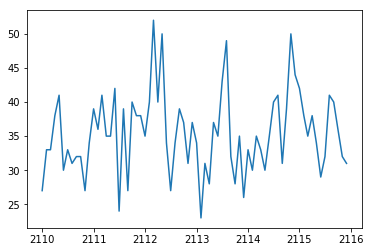

In [67]:
# check stationarity (i.e. that statistical properties like mean, variance stay constant over time)
for_graph = baseline_month[['ADMITS']].copy()
for_graph_subset = for_graph['2110-01-01':'2115-12-01']
plt.plot(for_graph_subset)

In [65]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling(timeseries, window=12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['ADMITS'])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

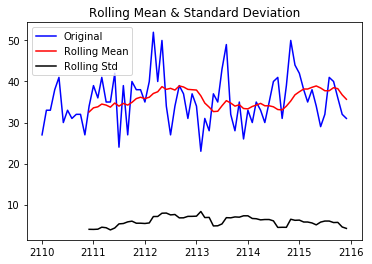

Results of Dickey-Fuller Test:
Test Statistic                -6.459363e+00
p-value                        1.456207e-08
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


In [68]:
test_stationarity(for_graph_subset)

Not stationary -- for model, we would need to transform to stationarity; but is that reflective of medical admissions?

Log Transform


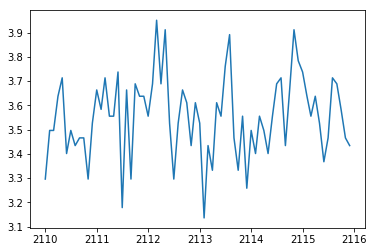

In [69]:
ts_log = np.log(for_graph_subset)
print("Log Transform")
plt.plot(ts_log)

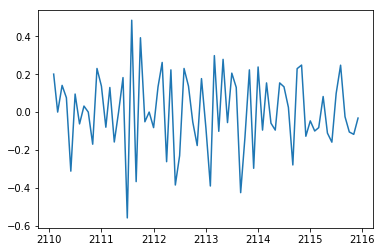

In [70]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

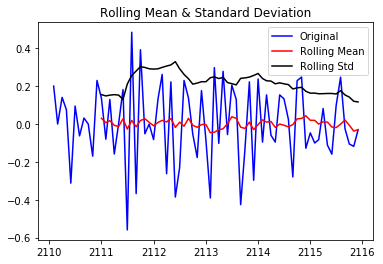

Results of Dickey-Fuller Test:
Test Statistic                -1.336274e+01
p-value                        5.387407e-25
#Lags Used                     0.000000e+00
Number of Observations Used    7.000000e+01
Critical Value (1%)           -3.527426e+00
Critical Value (5%)           -2.903811e+00
Critical Value (10%)          -2.589320e+00
dtype: float64


In [71]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [72]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

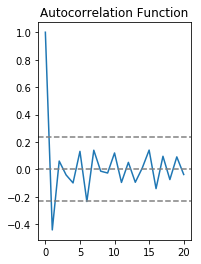

In [73]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

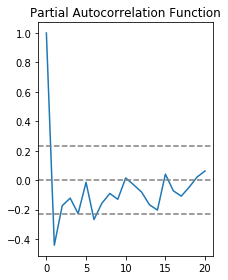

In [74]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [75]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

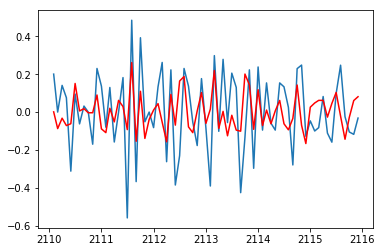

In [76]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

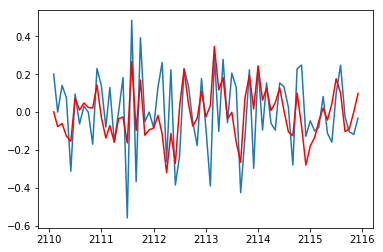

In [77]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ValueError: Cannot add integral value to Timestamp without freq.

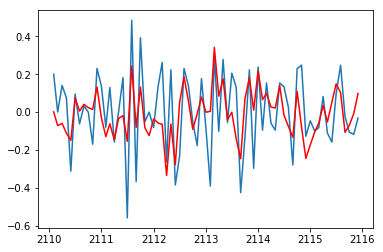

In [78]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [80]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

admitmonth
2110-02-01    0.000864
2110-03-01   -0.071209
2110-04-01   -0.060007
2110-05-01   -0.111352
2110-06-01   -0.149825
dtype: float64

In [81]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

admitmonth
2110-02-01    0.000864
2110-03-01   -0.070344
2110-04-01   -0.130351
2110-05-01   -0.241704
2110-06-01   -0.391528
dtype: float64

In [82]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


admitmonth
2110-01-01         NaN
2110-02-01    0.000864
2110-03-01   -0.070344
2110-04-01   -0.130351
2110-05-01   -0.241704
dtype: float64

NameError: name 'ts' is not defined

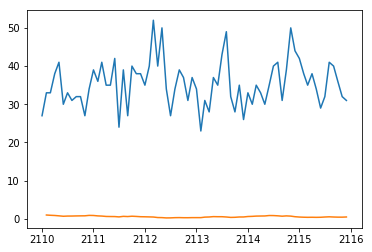

In [84]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(for_graph_subset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))